In [1]:
try:
    from linclab_utils import plot_utils
except ImportError as err:
    !pip install -q git+https://github.com/linclab/linclab_utils.git
    from linclab_utils import plot_utils

In [2]:
import wandb
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D
plot_utils.linclab_plt_defaults(font="Arial", fontdir="fonts")
from matplotlib.pyplot import cm
import re
import math

In [3]:
api = wandb.Api(timeout=19)

In [4]:
# Fetch runs for a specific project
def fetch_runs(api, entity, project_name, filters, order=None):
    if order:
        runs = api.runs(f"{entity}/{project_name}", filters=filters, order=order)
    else:
        runs = api.runs(f"{entity}/{project_name}", filters=filters)
    #print(f"Runs for project '{project_name}':")
    return runs

In [5]:
def same_config(config1, config2, keys=['normtype']):
    for key in keys:
        if config1[key] != config2[key]:
            return False
    return True

In [6]:
runs_dict = dict()
runs_dict["runs_vanilla_dann"] = fetch_runs(api, entity='project_danns', project_name='Luminosity_DeepDANN_ExhaustiveSearch', filters={"config.dataset": "fashionmnist", 
                                                            "config.homeostasis": 0, "config.normtype": 0,
                                                            "config.use_testset": True}, order="-summary_metrics.test_acc")
runs_dict["runs_vanilla_dann_layernorm"] = fetch_runs(api, entity='project_danns', project_name='Luminosity_DeepDANN_ExhaustiveSearch', filters={"config.dataset": "fashionmnist", 
                                                            "config.homeostasis": 0, "config.normtype": 1,
                                                            "config.use_testset": True}, order="-summary_metrics.test_acc")

In [9]:
EI = fetch_runs(api, entity='project_danns', project_name='Luminosity_DeepDANN_ExhaustiveSearch', filters={"config.dataset": "fashionmnist", 
                                                                        "config.homeostasis": 1, "config.normtype": 0,
                                                                        "config.use_testset": True, "config.task_opt_inhib": 1, "config.use_sep_bias_gain_lrs": 0,
                                                                        "config.homeostatic_annealing": 0 ,  "config.implicit_homeostatic_loss": 1}, order="-summary_metrics.test_acc")

In [10]:
len(EI)

198

/tmp/ipykernel_721401/3113338788.py:17: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  plt.scatter(rn.config['lambda_homeo'], rn.config['lambda_homeo_var'], color=cmap(values[int(rn.summary['test_acc'])]), vmin=70, vmax=90)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


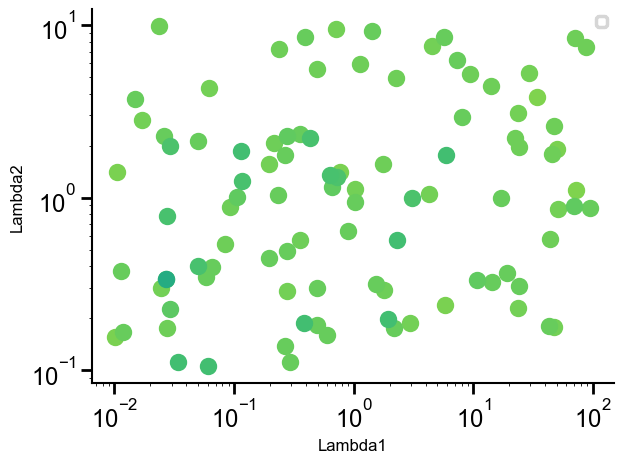

In [37]:
fig, ax = plt.subplots()
cmap = plt.get_cmap('viridis')

values = np.linspace(0, 1, 100)
#values = np.logspace(0, 1, num=100)/max(np.logspace(0, 1, num=100))

EI = fetch_runs(api, entity='project_danns', project_name='Luminosity_DeepDANN_ExhaustiveSearch', filters={"config.dataset": "fashionmnist", 
                                                                    "config.brightness_factor": 0.75,"config.homeostasis": 1, "config.normtype": 0,
                                                                    "config.use_testset": True, "config.task_opt_inhib": 1, "config.use_sep_bias_gain_lrs": 0,
                                                                    "config.homeostatic_annealing": 0, "config.implicit_homeostatic_loss": 1 }, order="-summary_metrics.test_acc")

data = []

activate_color = True

for idxx, rn in enumerate(EI):
    plt.scatter(rn.config['lambda_homeo'], rn.config['lambda_homeo_var'], color=cmap(values[int(rn.summary['test_acc'])]), vmin=70, vmax=90)
    activate_color = False



ax.set_xlabel("Lambda1")
ax.set_ylabel("Lambda2")
ax.legend(fontsize=10)
#ax.set_title(f'Brightness Factor {bright_factor}')
ax.set_xscale('log')
ax.set_yscale('log')